In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Load your dataset
df = pd.read_csv('./../data/airline-passengers.csv', parse_dates=['Month'], index_col='Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### De-trending with a Linear Model
In this example, we use a linear model to estimate and then remove the trend from a time series. Afterwards, we’ll use the model to predict the trend for future periods and add it back.

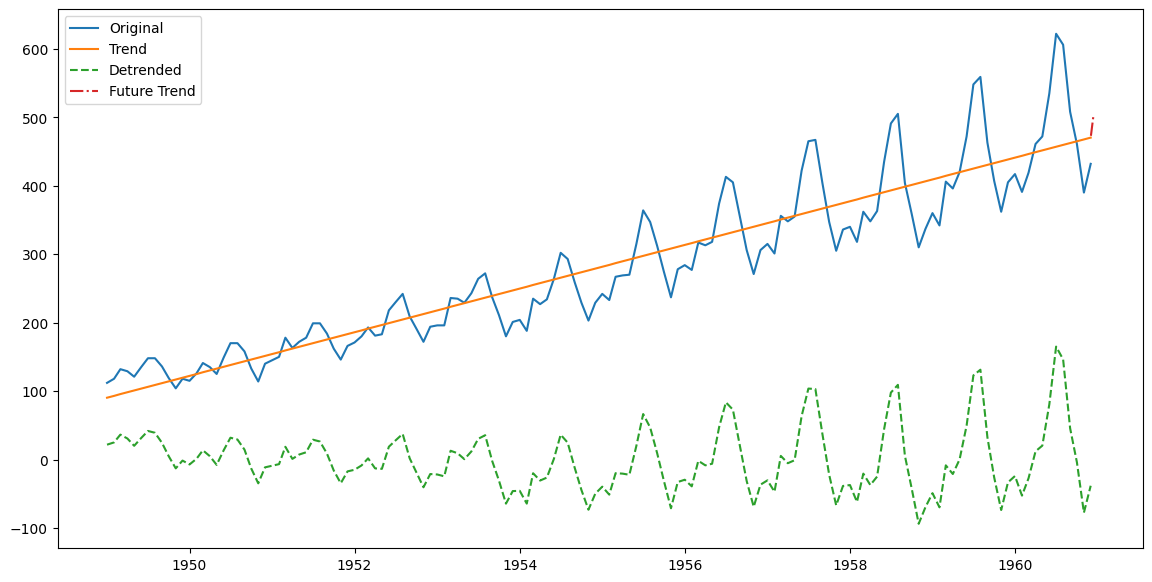

In [3]:
# Linear Model for Trend
time = np.arange(len(df.index))
model = LinearRegression()
model.fit(time.reshape(-1, 1), df['Passengers'])

# Estimate and remove trend
trend = model.predict(time.reshape(-1, 1))
detrended = df['Passengers'] - trend

# Predicting future trend for 12 more months
future_time = np.arange(len(df.index), len(df.index) + 12)
future_trend = model.predict(future_time.reshape(-1, 1))

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Passengers'], label='Original')
plt.plot(df.index, trend, label='Trend')
plt.plot(df.index, detrended, label='Detrended', linestyle='--')
plt.plot(pd.date_range(df.index[-1], periods=13, inclusive='right'), future_trend, label='Future Trend', linestyle='-.')
plt.legend()
plt.show()

In [10]:
future_trend

array([472.94444444, 475.60162835, 478.25881226, 480.91599617,
       483.57318008, 486.23036398, 488.88754789, 491.5447318 ,
       494.20191571, 496.85909962, 499.51628352, 502.17346743])

### De-trending with Loess Estimation and ETS Forecasting

For **Loess estimation** (locally weighted regression), we can use statsmodels. 


**Lowess smoothing,** which stands for locally weighted scatterplot smoothing, is a variation of loess smoothing that uses a robust weighting scheme to reduce the impact of outliers.


Subsequently, we apply an **ETS** (Error, Trend, Seasonality) model without a seasonal component to predict future trends.

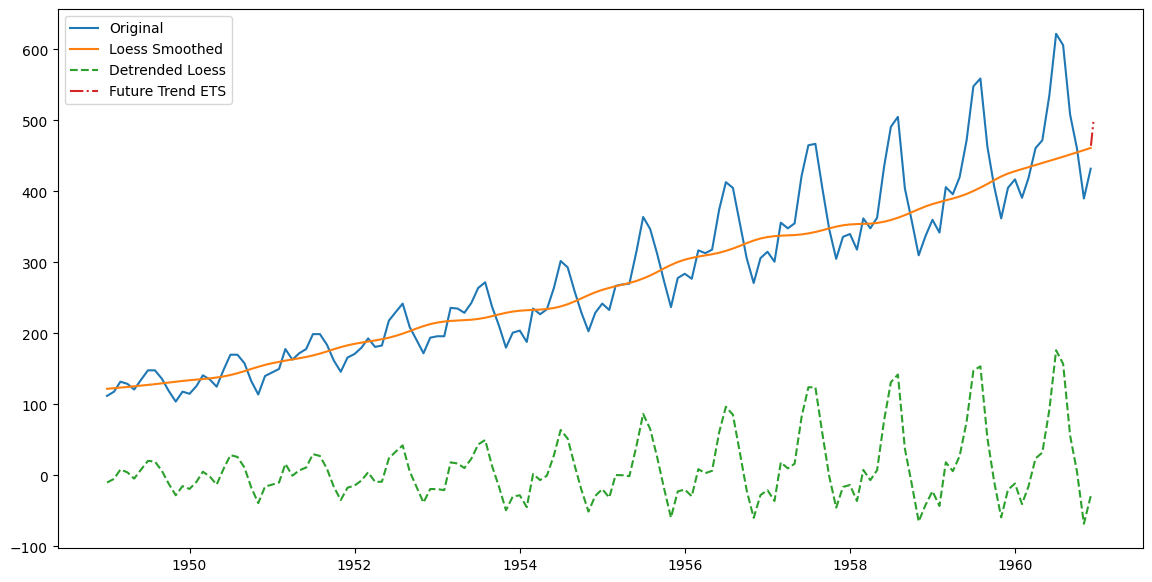

In [4]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Loess Smoothing
loess_smoothed = lowess(df['Passengers'], time, frac=0.2)[:, 1]

# Detrending
detrended_loess = df['Passengers'] - loess_smoothed

# ETS Model for trend prediction
model_ets = ExponentialSmoothing(loess_smoothed, trend="additive", seasonal=None, initialization_method="estimated")
fitted_model = model_ets.fit()

# Forecasting the trend
future_trend_ets = fitted_model.forecast(12)

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Passengers'], label='Original')
plt.plot(df.index, loess_smoothed, label='Loess Smoothed')
plt.plot(df.index, detrended_loess, label='Detrended Loess', linestyle='--')
plt.plot(pd.date_range(df.index[-1], periods=13, inclusive='right'), future_trend_ets, label='Future Trend ETS', linestyle='-.')
plt.legend()
plt.show()